## Statistical Significance of Names

In [1]:
#==== import needed libs ====#
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
import pandas as pd
import numpy as np
import datetime
import requests
import math
import lxml
import time
import csv
import io

In [2]:
names = pd.read_csv('alnavofc.csv', dtype={'Last Name': 'string', 'First Name': 'string', 'Middle Name': 'string', 'Suffix': 'string', 'Grade': 'string', 'Lineal/Precedence': np.float64, 'Year Group': np.float64, 'Designator': np.int32, 
                                           'COMPCAT': 'string', 'Date of Rank': 'string', 'Reture eligibility year': np.int32, 'Sex': 'string', 'Original Source': 'string'})
names.head()

,Last Name,First Name,Middle Name,Suffix,Grade,Lineal/Precedence,Year Group,Designator,COMPCAT,Date of Rank,Retire eligibility year,Sex,Original Source
0,AQUILINO,JOHN,CHRISTOPHER,<NA>,ADM,400.0,84.0,1310,URL,5/17/2018 0:00,2004,M,010
1,BURKE,ROBERT,PETER,<NA>,ADM,600.0,85.0,1120,URL,6/10/2019 0:00,2002,M,060
2,CALDWELL,JAMES,FRANKLIN,JR,ADM,100.0,80.0,1120,URL,8/14/2015 0:00,2001,M,010
3,GILDAY,MICHAEL,MARTIN,<NA>,ADM,700.0,85.0,1110,URL,8/22/2019 0:00,2005,M,010
4,GRADY,CHRISTOPHER,WATSON,<NA>,ADM,300.0,84.0,1110,URL,5/4/2018 0:00,2004,M,040


In [3]:
names['Suffix'] = names['Suffix'].fillna('')
names.head()

,Last Name,First Name,Middle Name,Suffix,Grade,Lineal/Precedence,Year Group,Designator,COMPCAT,Date of Rank,Retire eligibility year,Sex,Original Source
0,AQUILINO,JOHN,CHRISTOPHER,,ADM,400.0,84.0,1310,URL,5/17/2018 0:00,2004,M,010
1,BURKE,ROBERT,PETER,,ADM,600.0,85.0,1120,URL,6/10/2019 0:00,2002,M,060
2,CALDWELL,JAMES,FRANKLIN,JR,ADM,100.0,80.0,1120,URL,8/14/2015 0:00,2001,M,010
3,GILDAY,MICHAEL,MARTIN,,ADM,700.0,85.0,1110,URL,8/22/2019 0:00,2005,M,010
4,GRADY,CHRISTOPHER,WATSON,,ADM,300.0,84.0,1110,URL,5/4/2018 0:00,2004,M,040


In [4]:
names['Last Name'].describe()

count     74057
unique    31234
top       SMITH
freq        556
Name: Last Name, dtype: object

In [6]:
names.to_csv('alnavofc2.csv')

In [9]:
names.dtypes

Last Name                   object
First Name                  object
Middle Name                 object
Suffix                      object
Grade                       object
Lineal/Precedence          float64
Year Group                 float64
Designator                   int64
COMPCAT                     object
Date of Rank                object
Retire eligibility year     object
Sex                         object
Original Source             object
dtype: object

In [38]:
# names['Last Name'].value_counts()[:50].index.tolist()
names[names['Last Name'].str.endswith('EL')]['Last Name'].value_counts().to_csv('last_names.csv')

In [1]:
names[names['Last Name'].str.startswith('SM')]

NameError: name 'names' is not defined

In [4]:
# Get the count of each value
value_counts = names['Last Name'].value_counts()

# Select the values where the count is less than 3 (or 5 if you like)
to_remove = value_counts[value_counts <= 3].index

# Keep rows where the city column is not in to_remove
df = names[~names['Last Name'].isin(to_remove)]

In [6]:
print(df['Grade'].unique())

<StringArray>
['ADM', 'VADM', 'RDMU', 'RDML', 'CAPT', 'CDR', 'LCDR', 'LT', 'LTJG', 'ENS']
Length: 10, dtype: string


In [5]:
# df2 = df[df['Grade'] 
lower = df.loc[df['Grade'].isin(['LT', 'LTJG', 'ENS'])]
upper = df.loc[df['Grade'].isin(['ADM', 'VADM', 'RDMU', 'RDML', 'CAPT', 'CDR', 'LCDR'])]

In [14]:
upper['First Name'].describe()

count       22097
unique       2881
top       MICHAEL
freq          743
Name: First Name, dtype: object

In [15]:
lower['First Name'].describe()

count       29203
unique       4435
top       MICHAEL
freq          642
Name: First Name, dtype: object

In [15]:
upr_norm = upper['First Name'].value_counts(normalize=True) # .to_csv('upper_names.csv')
lwr_norm = lower['First Name'].value_counts(normalize=True) # .to_csv('lower_names.csv')
upr_norm2 = upr_norm.to_frame()
lwr_norm2 = lwr_norm.to_frame()
upr_norm2.rename(columns={'First Name': 'Upper Freq'}, inplace=True)
lwr_norm2.rename(columns={'First Name': 'Lower Freq'}, inplace=True)
upr_norm2['First Name'] = upr_norm2.index
lwr_norm2['First Name'] = lwr_norm2.index
upr_norm3 = upr_norm2.reset_index(drop=True)
lwr_norm3 = lwr_norm2.reset_index(drop=True)

In [16]:
lwr_norm3.head()

,Lower Freq,First Name
0,0.021968,MICHAEL
1,0.020118,MATTHEW
2,0.018494,JOHN
3,0.017818,CHRISTOPHER
4,0.017637,ANDREW


In [19]:
df3 = pd.merge(upr_norm3, lwr_norm3, how='inner', on=['First Name'])
df4 = df3[["First Name", "Lower Freq", "Upper Freq"]]
df4.head()

,First Name,Lower Freq,Upper Freq
0,MICHAEL,0.021968,0.032545
1,CHRISTOPHER,0.017818,0.027359
2,JOHN,0.018494,0.025809
3,MATTHEW,0.020118,0.025094
4,DAVID,0.012946,0.023783


<AxesSubplot:>

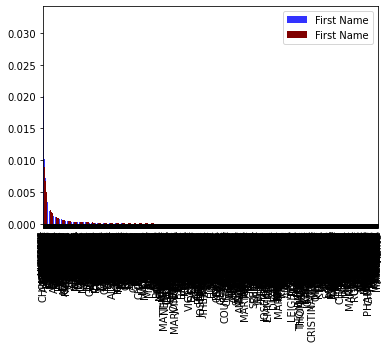

In [33]:
ax = upr_norm.plot(kind='bar', color='blue', width=.75, legend=True, alpha=0.8)
lwr_norm.plot(kind='bar', color='maroon', width=.5, alpha=1, legend=True)

In [32]:
merged = pd.merge(
    upr_norm.to_frame(),
    lwr_norm.to_frame(),
    left_index=True,
    right_index=True,
    suffixes=(' upr', ' lwr'))

stats.ks_2samp(merged['First Name upr'], merged['First Name lwr'])

KstestResult(statistic=0.2598551890587289, pvalue=2.7716549798363235e-37)

,First Name
